In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, RANSACRegressor

In [26]:
dataset = fetch_california_housing(as_frame = True)

In [22]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [30]:
house_prices = dataset.frame

In [31]:
house_prices

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


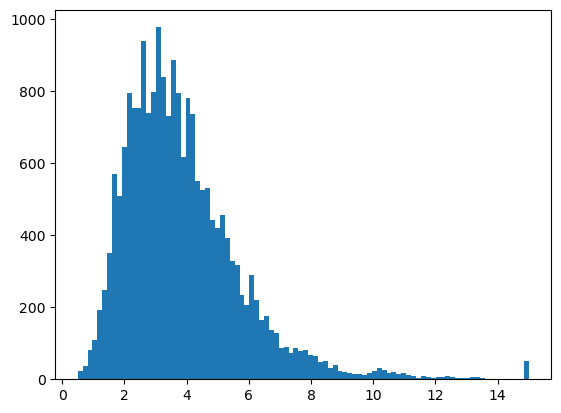

In [33]:
plt.hist(house_prices.MedInc, bins = "fd")
plt.show()

In [34]:
house_prices[house_prices.MedInc > 15].sort_values("MedInc")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.50000
8850,15.0001,37.0,9.333333,1.037801,809.0,2.780069,34.09,-118.41,5.00001
8851,15.0001,40.0,9.600000,1.059459,1024.0,2.767568,34.09,-118.42,5.00001
8852,15.0001,48.0,9.729839,1.052419,770.0,3.104839,34.08,-118.42,5.00001
8853,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41,5.00001
8854,15.0001,52.0,8.710145,1.028986,408.0,2.956522,34.07,-118.41,5.00001
8878,15.0001,52.0,8.000000,0.997333,1143.0,3.048000,34.04,-118.50,5.00001
10673,15.0001,13.0,7.842900,0.993958,1865.0,2.817221,33.62,-117.85,5.00001
10760,15.0001,15.0,8.062044,1.003650,735.0,2.682482,33.62,-117.87,5.00001
11520,15.0001,14.0,8.354232,1.037618,964.0,3.021944,33.72,-118.06,5.00001


In [35]:
house_prices.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


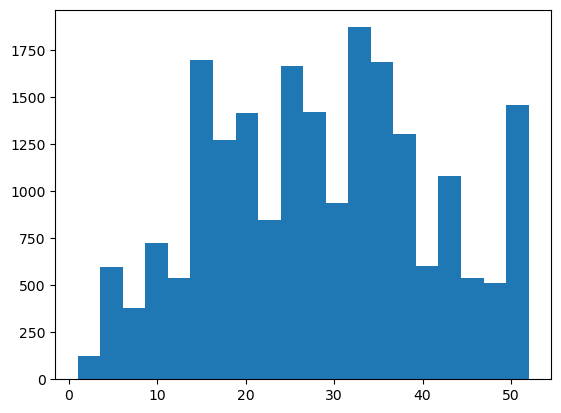

In [39]:
plt.hist(house_prices.HouseAge, bins = 20)
plt.show()

In [38]:
house_prices.HouseAge.sort_values().unique().tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0]

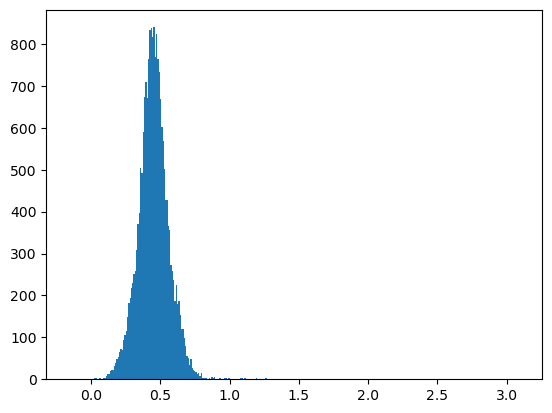

In [55]:
plt.hist(np.log10(house_prices.AveOccup), bins = "fd")
plt.show()

In [50]:
house_prices[np.log10(house_prices.AveOccup) > 1.5].sort_values("AveOccup")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


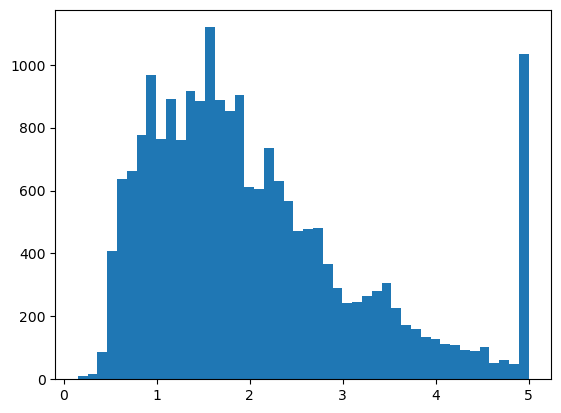

In [93]:
plt.hist(house_prices.MedHouseVal, bins = "fd")
plt.show()

In [96]:
house_prices[house_prices.MedHouseVal > 5].MedHouseVal.unique()

array([5.00001])

In [97]:
house_prices = house_prices[house_prices.MedHouseVal <= 5]

In [98]:
house_model = LinearRegression()

In [99]:
house_attributes = house_prices.drop(columns = ["MedHouseVal"])
house_values = house_prices.MedHouseVal

In [100]:
house_model.fit(house_attributes, house_values)

LinearRegression()

In [101]:
house_model.coef_

array([ 4.32039991e-01,  8.17895781e-03, -1.10512216e-01,  6.13453908e-01,
        4.59347590e-06, -3.44772055e-03, -3.79403380e-01, -3.95909847e-01])

In [102]:
house_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

In [104]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', 0.43203999075155347),
 ('HouseAge', 0.008178957814136054),
 ('AveRooms', -0.110512215520179),
 ('AveBedrms', 0.6134539079605438),
 ('Population', 4.593475896534638e-06),
 ('AveOccup', -0.0034477205518171706),
 ('Latitude', -0.37940337956504716),
 ('Longitude', -0.3959098468967251)]

In [105]:
scaler = MinMaxScaler()

In [106]:
house_attributes_scaled = scaler.fit_transform(house_attributes)

In [112]:
house_attributes_scaled.shape

(19675, 8)

In [108]:
house_model_scaled = LinearRegression()

In [113]:
house_model_scaled.fit(house_attributes_scaled, house_values)

LinearRegression()

In [115]:
house_model_scaled

LinearRegression()

In [117]:
list(zip(house_model.feature_names_in_, house_model_scaled.coef_))

[('MedInc', 6.264666273895668),
 ('HouseAge', 0.41712684852092896),
 ('AveRooms', -14.553041960731614),
 ('AveBedrms', 20.693845161869),
 ('Population', 0.16389062651233946),
 ('AveOccup', -4.284279002633804),
 ('Latitude', -3.5701858017070967),
 ('Longitude', -3.97493486284312)]

In [119]:
z_score = StandardScaler().fit_transform(house_attributes)

In [120]:
z_score_model = LinearRegression()

In [121]:
z_score_model.fit(z_score, house_values)

LinearRegression()

In [122]:
list(zip(house_model.feature_names_in_, z_score_model.coef_))

[('MedInc', 0.6784028909722386),
 ('HouseAge', 0.102308906315969),
 ('AveRooms', -0.2533470347321344),
 ('AveBedrms', 0.27717527061724223),
 ('Population', 0.0052531893504088115),
 ('AveOccup', -0.03665515422123453),
 ('Latitude', -0.8156213233862947),
 ('Longitude', -0.7942178625015106)]

In [124]:
z_score_model.score(z_score, house_values)

0.5701011070331932

In [125]:
ransac_model = RANSACRegressor()

In [126]:
ransac_model.fit(house_attributes_scaled, house_values)

RANSACRegressor()

In [128]:
ransac_model.estimator_.coef_

array([  6.52971634,   0.11472275, -20.73949886,  53.64958047,
        -2.50975517,   1.59645939,  -2.02156975,  -2.55088745])

In [129]:
ransac_model.inlier_mask_.sum()

13437

In [132]:
house_attributes[ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [133]:
house_attributes[~ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25
...,...,...,...,...,...,...,...,...
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47
20623,2.8235,32.0,5.101322,1.074890,598.0,2.634361,39.03,-121.37
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52
20629,2.0943,28.0,5.519802,1.020902,6912.0,3.801980,39.12,-121.39


In [134]:
house_model_scaled.score(house_attributes_scaled, house_values)

0.5701011070331934

In [135]:
ransac_model.score(house_attributes_scaled, house_values)

0.3393785250998319

In [136]:
ransac_model.score(house_attributes_scaled[ransac_model.inlier_mask_], house_values[ransac_model.inlier_mask_])

0.8108621029607508

In [137]:
ransac_model = RANSACRegressor(residual_threshold = 0.1, min_samples = 100)
ransac_model.fit(house_attributes_scaled, house_values)
ransac_model.inlier_mask_.sum() / len(house_attributes_scaled)

0.16655654383735705

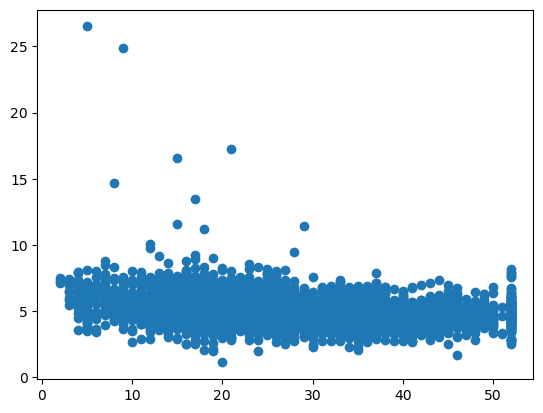

In [138]:
plt.scatter(house_attributes[ransac_model.inlier_mask_].HouseAge, house_attributes[ransac_model.inlier_mask_].AveRooms)

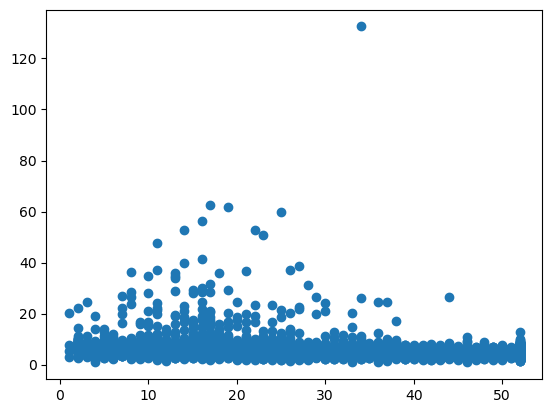

In [141]:
plt.scatter(house_attributes[~ransac_model.inlier_mask_].HouseAge, house_attributes[~ransac_model.inlier_mask_].AveRooms)

In [142]:
house_attributes.AveRooms * house_attributes.MedInc * house_attributes.AveBedrms

0        59.528641
1        50.329095
2        64.568135
3        35.226282
4        26.120286
           ...    
20635     8.922079
20636    20.568901
20637     9.912171
20638    11.662086
20639    14.588062
Length: 19675, dtype: float64

In [146]:
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(house_attributes_scaled)

PolynomialFeatures(degree=3)

In [147]:
poly_transformer.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2',
       'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7',
       'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7',
       'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6',
       'x4 x7', 'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2', 'x0^3',
       'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6',
       'x0^2 x7', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4',
       'x0 x1 x5', 'x0 x1 x6', 'x0 x1 x7', 'x0 x2^2', 'x0 x2 x3',
       'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x2 x7', 'x0 x3^2',
       'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x3 x7', 'x0 x4^2',
       'x0 x4 x5', 'x0 x4 x6', 'x0 x4 x7', 'x0 x5^2', 'x0 x5 x6',
       'x0 x5 x7', 'x0 x6^2', 'x0 x6 x7', 'x0 x7^2', 'x1^3', 'x1^2 x2',
       'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1^2 x6', 'x1^2 x7', 'x1 x2^2',
       'x1 x2 x3', 'x1 x2 x4', 'x1

In [148]:
poly_regression = LinearRegression()
poly_regression.fit(poly_transformer.transform(house_attributes_scaled), house_values)

LinearRegression()

In [149]:
poly_regression.score(poly_transformer.transform(house_attributes_scaled), house_values)

0.6998591049598402